In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
%pylab inline
from numpy import copy
import scipy as sp

from ipywidgets import FloatProgress
from IPython.display import display

import timeit

import fibonacci_heap_mod as fhm

from scipy import sparse

from tqdm import tqdm

from time import sleep
import threading

Populating the interactive namespace from numpy and matplotlib


In [3]:
from numpy.linalg import eig
from numpy.linalg import norm

class ObjectiveGenerator:
    
    def __init__(self, c, q, u, s):
        self.c = c
        self.q = q
        self.u = u
        self.s = s
        self.elems = {"sec_eig": second_eignvalue, "price": price, "power_deviations": power_deviations}
    
    def second_eignvalue(self, P):
        return sorted(eig(P)[0])[1]
    
    def price(self, P):
        return self.c*self.q.dot(P.dot(self.u))
    
    def power_deviations(self, P):
        return (self.q.dot(P.dot(self.u)) - s)**2
    
    def get_objective(self, factors):
        return lambda P: sum([elems[factor](P) for factor in factors])
    
    def se_lagrangian_grad(self, P, Q, Y, rho, w, z):
        v2 = eig(P)[1][:, 1]
        

In [4]:
def lag_grad_p(P, Q, Y, rho, w, z, pi):
    v2 = eig(P)[1][:, 1]
    last_part = [[rho*pi[j]*(p[j,i]-1) for j in P.shape[1]] for i in P.shape[0]]
    

In [ ]:
from src.main import solve
from time import time

times = []
for n in tqdm([5, 10, 50, 80, 100, 150, 300]):
    c = 1
    u = zeros(n).reshape((n, 1))
    u[0][0] = 1
    s = 1
    pi = (ones(n)/n).reshape((n, 1))
    q = ones(n).reshape((n, 1))
    begin = time()
    P, log, converged = solve(c, u, s, pi, q)
    end = time()
    times.append(end-begin)

In [13]:
times[-1] = 180

([<matplotlib.axis.XTick at 0x10e83e278>,
 <a list of 7 Text xticklabel objects>)

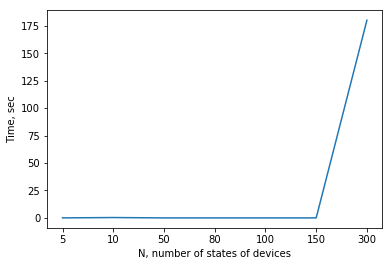

In [14]:
plot(times)
xlabel("N, number of states of devices")
ylabel("Time, sec")
xticks(range(len(times)), [5, 10, 50, 80, 100, 150, 300])

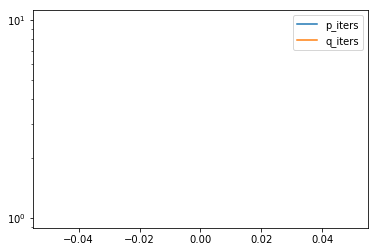

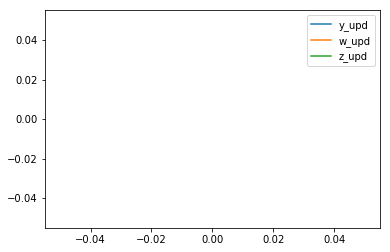

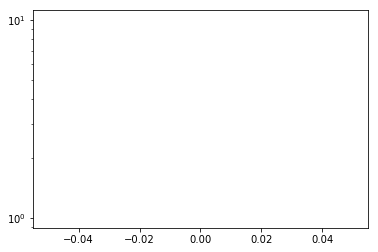

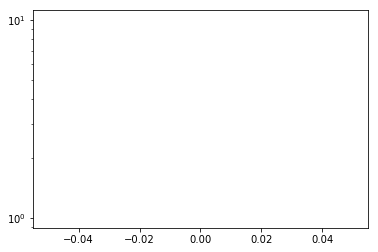

In [15]:
semilogy(log["P_iters"], label="p_iters")
semilogy(log["Q_iters"], label="q_iters")
legend()
show()
plot(log["y_upd"], label = "y_upd")
plot(log["w_upd"], label = "w_upd")
plot(log["z_upd"], label = "z_upd")
legend()
show()
semilogy(log["pi_constr"])
show()
semilogy(log["P_Q_difference"])

In [147]:
rho_y = 1
rho_w = 1
rho_z = 1
pi = (ones(n)/3).reshape((n, 1))
H = zeros((n,n,n,n))
pipi_t = pi.dot(pi.T)
for i in range(n):
    H[i, i, :, :] += rho_y*ones((n, n))
    H[i, :, i, :] += rho_z*ones((n, n))
    H[i, :, :, i] += rho_w*pipi_t

P = eye(n) + 0.0001*randn(n, n)
l2, v2 = sorted(zip(*eig(P.T.dot(P))), key=lambda x: x[0], reverse=True)[1]
pinv_comp = P.T.dot(linalg.pinv(l2*eye(n) - P.T.dot(P)))

for i in range(n):
    for j in range(n):
        ans = 4*v2.dot(P[:, i])*pinv_comp
        ans[i, :] += v2
        H[i, j, :, :] += v2[j]*ans
np.linalg.tensorinv(H)

array([[[[ -0.59958169,   0.30676548,  -0.54810985],
         [ -2.97406   ,   3.14526803,  -1.08678148],
         [ -1.40307507,   1.53791454,  -1.23617143]],

        [[  0.75304552,   0.32575763,  -0.37663439],
         [  2.60471252,  -3.71328203,   1.61142408],
         [ -4.5365592 ,   4.20145093,   1.41907033]],

        [[ -0.84041459,   0.53431848,   2.60183894],
         [  2.79799616,  -1.97923628,   0.73038594],
         [  1.6477027 ,  -1.54364393,   1.34509361]]],


       [[[  2.99736269,  -4.39624781,  -2.0573585 ],
         [ -5.56193198,   6.21475532,  -4.02724776],
         [  0.83344111,  -0.53548271,  -4.4294047 ]],

        [[ -2.7046047 ,   3.00063927,   1.76090696],
         [  4.54367732,  -4.44975051,   2.09012243],
         [  5.69258515,  -6.47499377,   3.63644323]],

        [[  0.61218587,   0.11477806,  -0.65482297],
         [ -1.64439976,   1.14878996,   1.39086676],
         [ -2.4248981 ,   2.94896917,  -0.95591312]]],


       [[[  5.01412419,  -6.46

In [16]:
from random import choices

In [17]:
choices(range(10), weights=range(10))

[6]

In [18]:
from Ensemble import AbstractEnsemble
from main import solve

In [19]:
from scipy.optimize import minimize

pi_old = array([0, 1, 0])
q = arange(3)+1
s = 3
f = lambda x: norm(x - pi_old)**2

cons = [{"type": "eq", "fun": lambda x: x.dot(q) - s},
        {"type": "eq", "fun": lambda x: x.dot(ones(3)) - 1}]
bnds = [(0, None) for _ in range(3)]
res = minimize(f, (1, 0,0), method='SLSQP', bounds=bnds, constraints=tuple(cons))


In [20]:
res

     fun: 1.9999999999999776
     jac: array([ 1.99999997, -2.00000001,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 6
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([  0.00000000e+00,   7.38298311e-15,   1.00000000e+00])

In [21]:
def find_pi_new(pi_old, q, s):
    n = len(q)
    f = lambda x: norm(x - pi_old)**2
    cons = [{"type": "eq", "fun": lambda x: x.dot(q) - s},
            {"type": "eq", "fun": lambda x: x.dot(ones(n)) - 1}]
    bnds = [(0, None) for _ in range(n)]
    res = minimize(f, pi_old, method='SLSQP', bounds=bnds, constraints=tuple(cons))
    return res.x

In [25]:
from time import time
from Ensemble import AbstractEnsemble
from main import solve
from scipy.optimize import minimize

K = 300
N = 5

np.random.seed(42)

ensemble = AbstractEnsemble(K, default_policy = ones((N, N))/N, tick=0.01, random_seed=42)
states = []
consumption = []
ss = []
sol = []
us = []
pn = []
sn = []
s = 0

q = (arange(N) + 1).reshape((N, 1))
def c(t):
    return 1

def find_pi_new(pi_old, q, s):
    n = len(q)
    f = lambda x: norm(x - pi_old)**2
    cons = [{"type": "eq", "fun": lambda x: x.dot(q) - s},
            {"type": "eq", "fun": lambda x: x.dot(ones(n)) - 1}]
    bnds = [(0, None) for _ in range(n)]
    res = minimize(f, pi_old, method='SLSQP', bounds=bnds, constraints=tuple(cons))
    return res.x.reshape((n, 1))
    
try:
    ensemble.run()

    for i in tqdm(range(1,201)):
        sleep(0.01)
        if i % 5 == 0 and rand() > 2/3:
            s = 1 + rand()*(N-2)
            u = states[-1]
            pi_new = find_pi_new(u, q, s)
            #print(c(i), u, s, pi_new, q)
            begin = time()
            us.append(u)
            pn.append(pi_new)
            sn.append(s)
            P, log, converged = solve(c(i), u, s, pi_new, q)
            end = time()
            sol.append(end-begin)
            ensemble.change_policy(P)
        ss.append(s)
        states.append(copy(ensemble.get_state_distribution().reshape((N, 1))))
        states[-1] /= sum(states[-1])
        consumption.append(q.T.dot(states[-1]))
finally:     
    ensemble.stop()

100%|██████████| 200/200 [00:20<00:00,  9.85it/s]


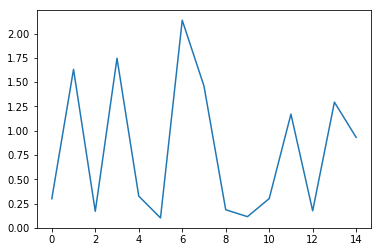

In [23]:
plot(sol)

---

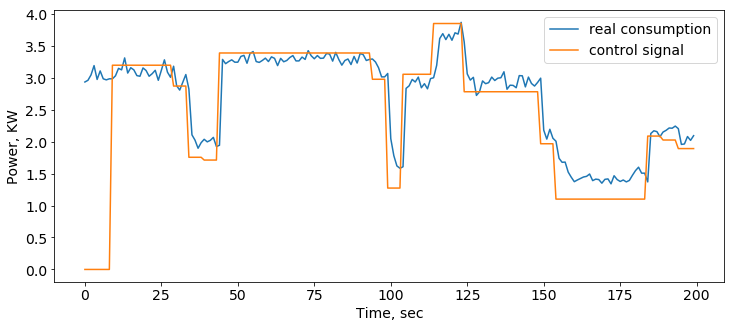

In [93]:
matplotlib.rcParams.update({"font.size":14})
figure(figsize=(12, 5))
plot([x[0, 0] for x in consumption], label="real consumption")
plot(ss, label="control signal")
xlabel("Time, sec")
ylabel("Power, KW")
legend()


  4%|▍         | 9/200 [00:02<00:57,  3.35it/s]
Exception in thread Thread-4:
Traceback (most recent call last):
  File "/Users/aksholokhov/.anaconda/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/aksholokhov/.anaconda/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/aksholokhov/.anaconda/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 200/200 [10:16<00:00,  3.08s/it]


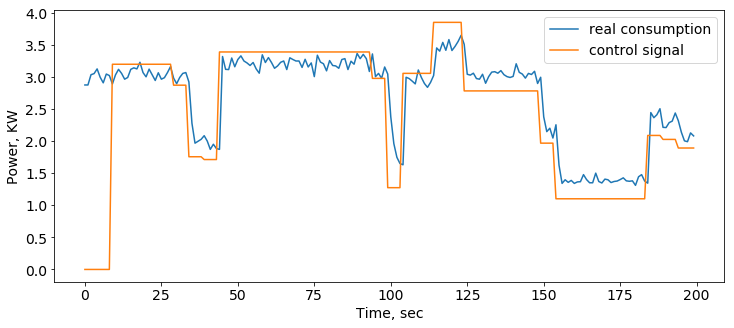

In [8]:
from time import time
from src.Ensemble import AbstractEnsemble
from src.main import solve
from scipy.optimize import minimize

K = 300
N = 5

np.random.seed(42)

ensemble = AbstractEnsemble(K, default_policy = ones((N, N))/N, tick=0.01, random_seed=42)
states = []
consumption = []
ss = []
sol = []
us = []
pn = []
sn = []
s = 0

q = (arange(N) + 1).reshape((N, 1))
def c(t):
    return 1

def find_pi_new(pi_old, q, s):
    n = len(q)
    f = lambda x: norm(x - pi_old)**2
    cons = [{"type": "eq", "fun": lambda x: x.dot(q) - s},
            {"type": "eq", "fun": lambda x: x.dot(ones(n)) - 1}]
    bnds = [(0, None) for _ in range(n)]
    res = minimize(f, pi_old, method='SLSQP', bounds=bnds, constraints=tuple(cons))
    return res.x.reshape((n, 1))
    
try:
    ensemble.run()

    for i in tqdm(range(1,201)):
        sleep(0.02)
        if i % 5 == 0 and rand() > 2/3:
            s = 1+ rand()*(N-2)
            u = states[-1]
            pi_new = find_pi_new(u, q, s)
            #print(c(i), u, s, pi_new, q)
            begin = time()
            us.append(u)
            pn.append(pi_new)
            sn.append(s)
            P, log, converged = solve(c(i), u, s, pi_new, q)
            end = time()
            sol.append(end-begin)
            ensemble.change_policy(P)
        ss.append(s)
        states.append(copy(ensemble.get_state_distribution().reshape((N, 1))))
        states[-1] /= sum(states[-1])
        consumption.append(q.T.dot(states[-1]))
finally:     
    ensemble.stop()
    
matplotlib.rcParams.update({"font.size":14})
figure(figsize=(12, 5))
plot([x[0, 0] for x in consumption], label="real consumption")
plot(ss, label="control signal")
xlabel("Time, sec")
ylabel("Power, KW")
legend()

In [7]:
%%time
n = 3
c = 1
u = array([[ 0.84],
        [ 0.1 ],
        [ 0.06]])
s = 1
pi = array([[  1.00000000e+00],
        [  1.33226763e-15],
        [  0.00000000e+00]])
q = (arange(n)+1).reshape((n, 1))
P, log, converged = solve(c, u, s, pi, q)

CPU times: user 81.7 ms, sys: 5.31 ms, total: 87 ms
Wall time: 86.7 ms


In [8]:
norm(P.T.dot(pi) - pi)

0.068922348887312357

In [9]:
norm(P.dot(ones(n)) - ones(n))

0.032095065845880656

In [10]:
P

array([[ 0.93914602,  0.0229984 ,  0.02276306],
       [ 0.38596816,  0.2996029 ,  0.29385803],
       [ 0.41106765,  0.28856812,  0.28089252]])

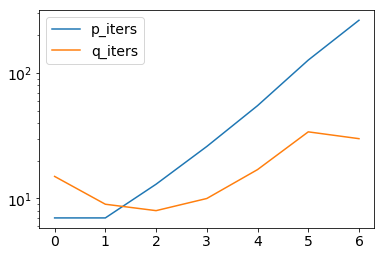

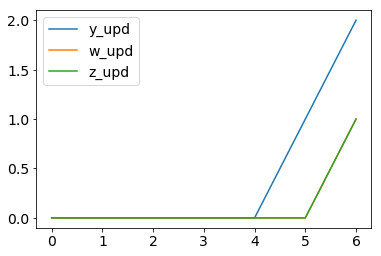

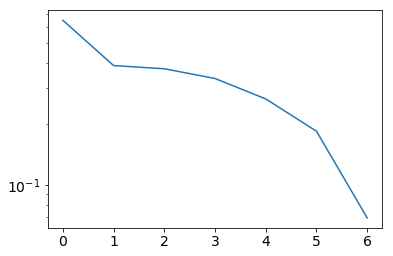

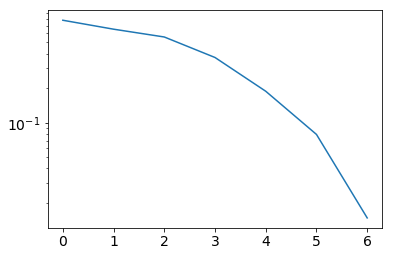

In [11]:
semilogy(log["P_iters"], label="p_iters")
semilogy(log["Q_iters"], label="q_iters")
legend()
show()
plot(log["y_upd"], label = "y_upd")
plot(log["w_upd"], label = "w_upd")
plot(log["z_upd"], label = "z_upd")
legend()
show()
semilogy(log["pi_constr"])
show()
semilogy(log["P_Q_difference"])